In [1]:
import os, json
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
# improve seaborn appearance
sns.set_style("whitegrid", {'font.family': 'serif', 'font.serif': ['Times', 'Palatino']})

# lists to store in read in data
data_bert = []
pure_data_bert = []
press_statements_classed = []

path_to_json = './data_bert_class/'

for file_name in [file for file in os.listdir(path_to_json) if file.endswith('.json')]:
    with open(path_to_json + file_name, encoding="utf8") as json_file:
        file = json.load(json_file)
        
        data_bert.append(file)
for i in data_bert:
    pure_data_bert.extend(i['data'])
    


In [2]:
for i in pure_data_bert:
    if i.get("manual_class") is not None:
        press_statements_classed.append(i)
        
Y = [x['manual_class'] for x in press_statements_classed]    

classes = set(pd.Series(Y).value_counts().index)

class_dict = {}

for i in classes:
    class_dict.update({i:[]})
    
for i in pure_data_bert:
    class_dict[i['bert_class']].append(i)


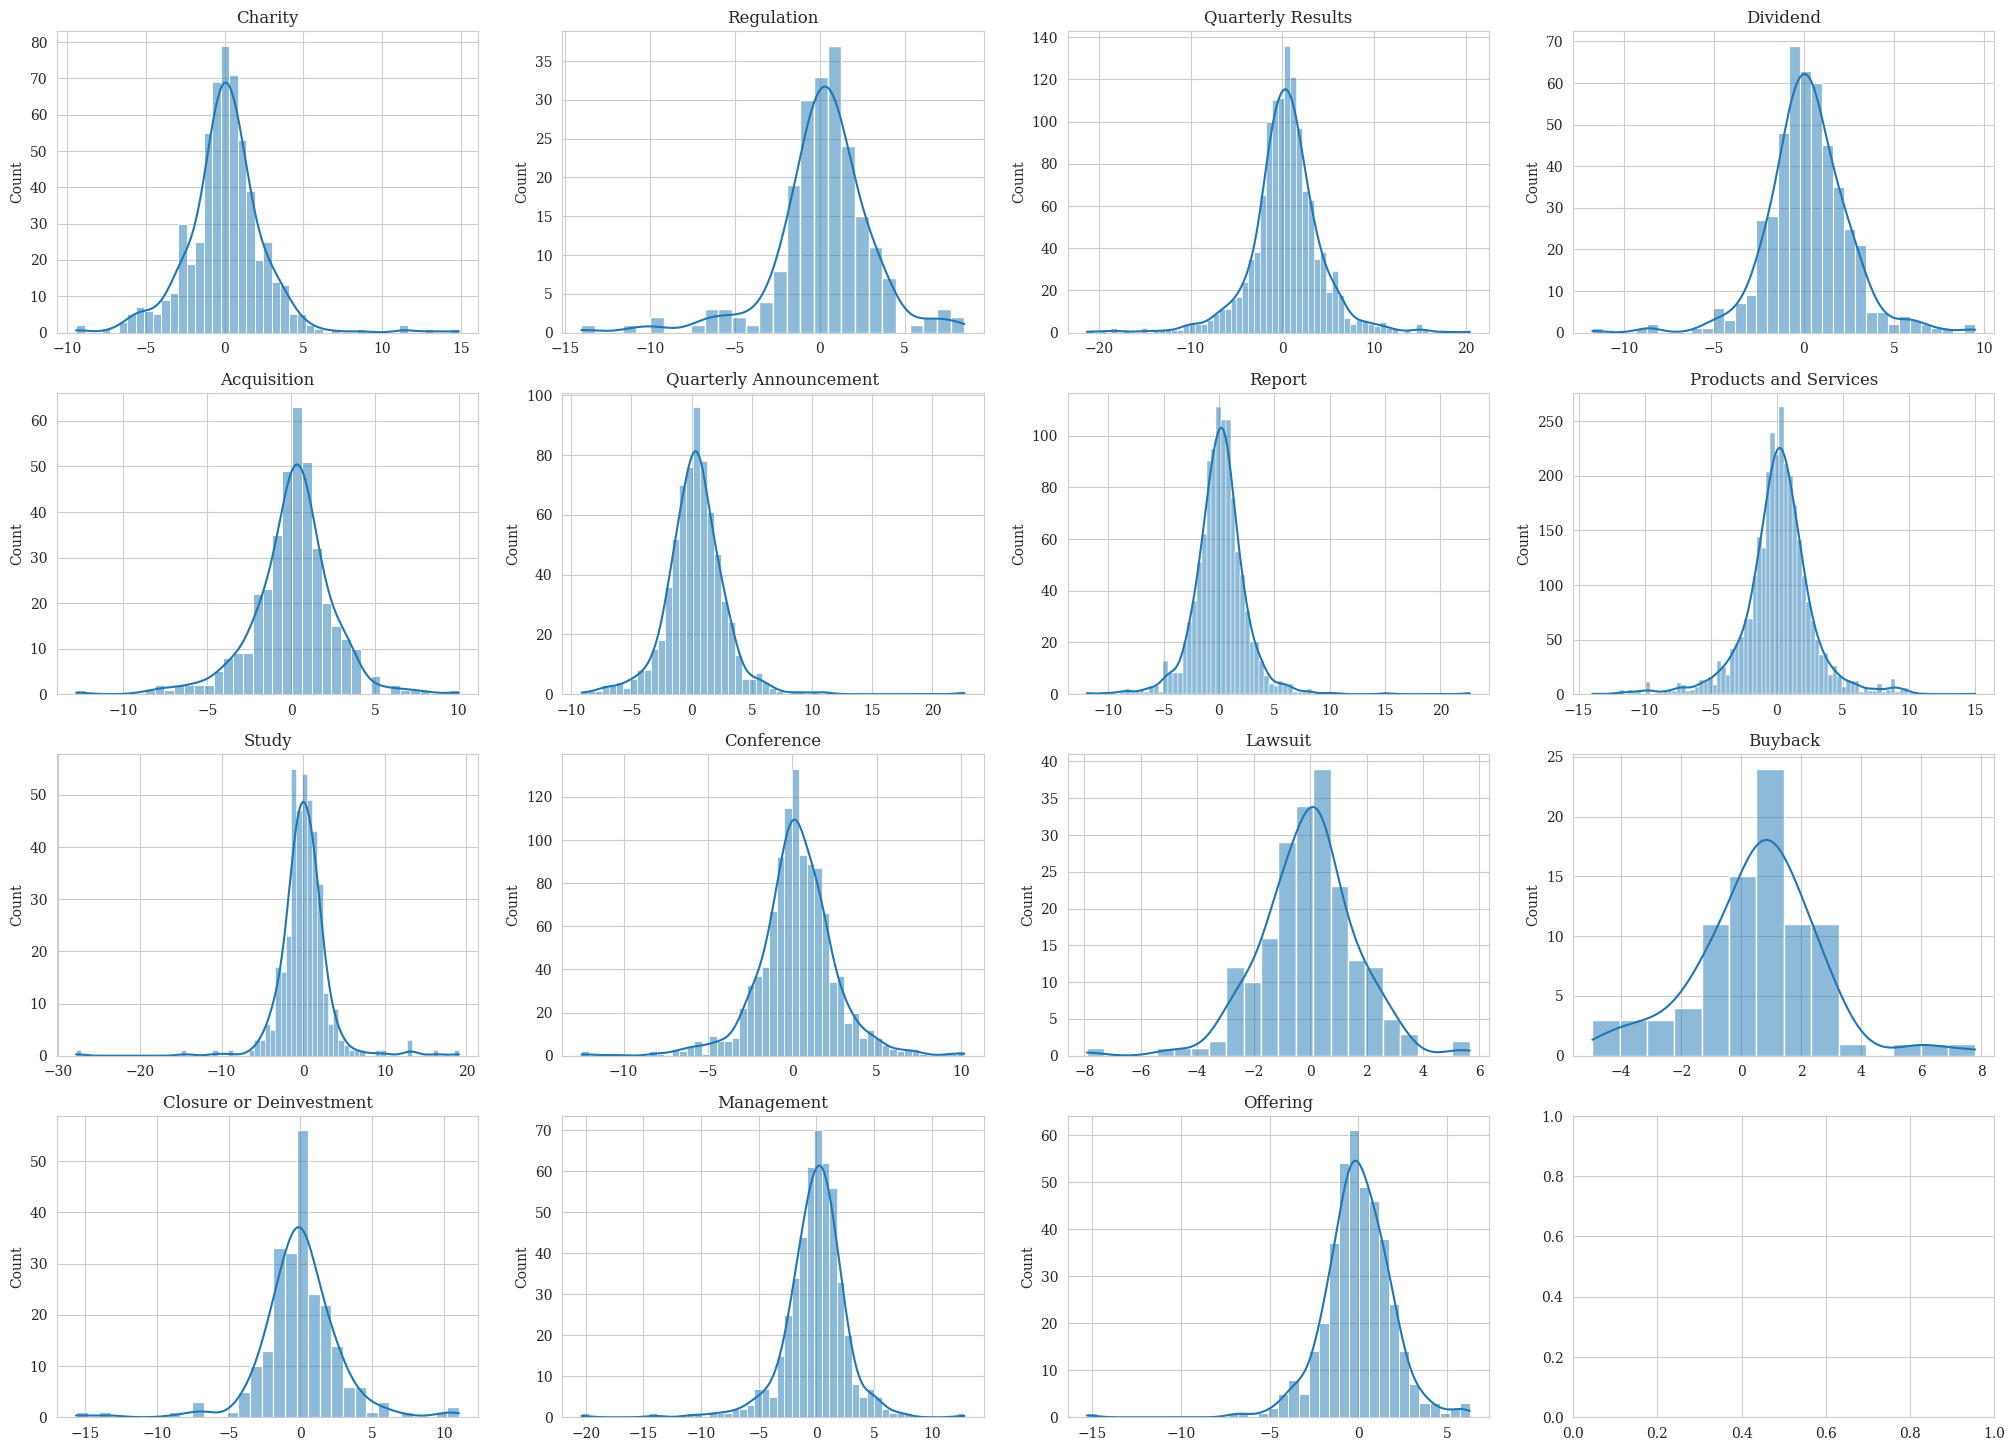

In [3]:
def changes_class(cur_class, class_dict):
    prices = [x['1d_change'] for x in class_dict[cur_class]]
    return prices
    
def changes_class_norm(cur_class, class_dict):
    prices = [x['norm_price'] for x in class_dict[cur_class]]
    return prices

fig, axes = plt.subplots(4, 4, figsize=(25, 18))

x_cord = 0
y_cord = 0

for cur_class in classes:

    sns.histplot(changes_class(cur_class, class_dict), kde=True, ax=axes[y_cord, x_cord]).set(title=cur_class)
    x_cord = x_cord + 1
    if x_cord == 4:
        x_cord = 0
        y_cord = y_cord + 1

    

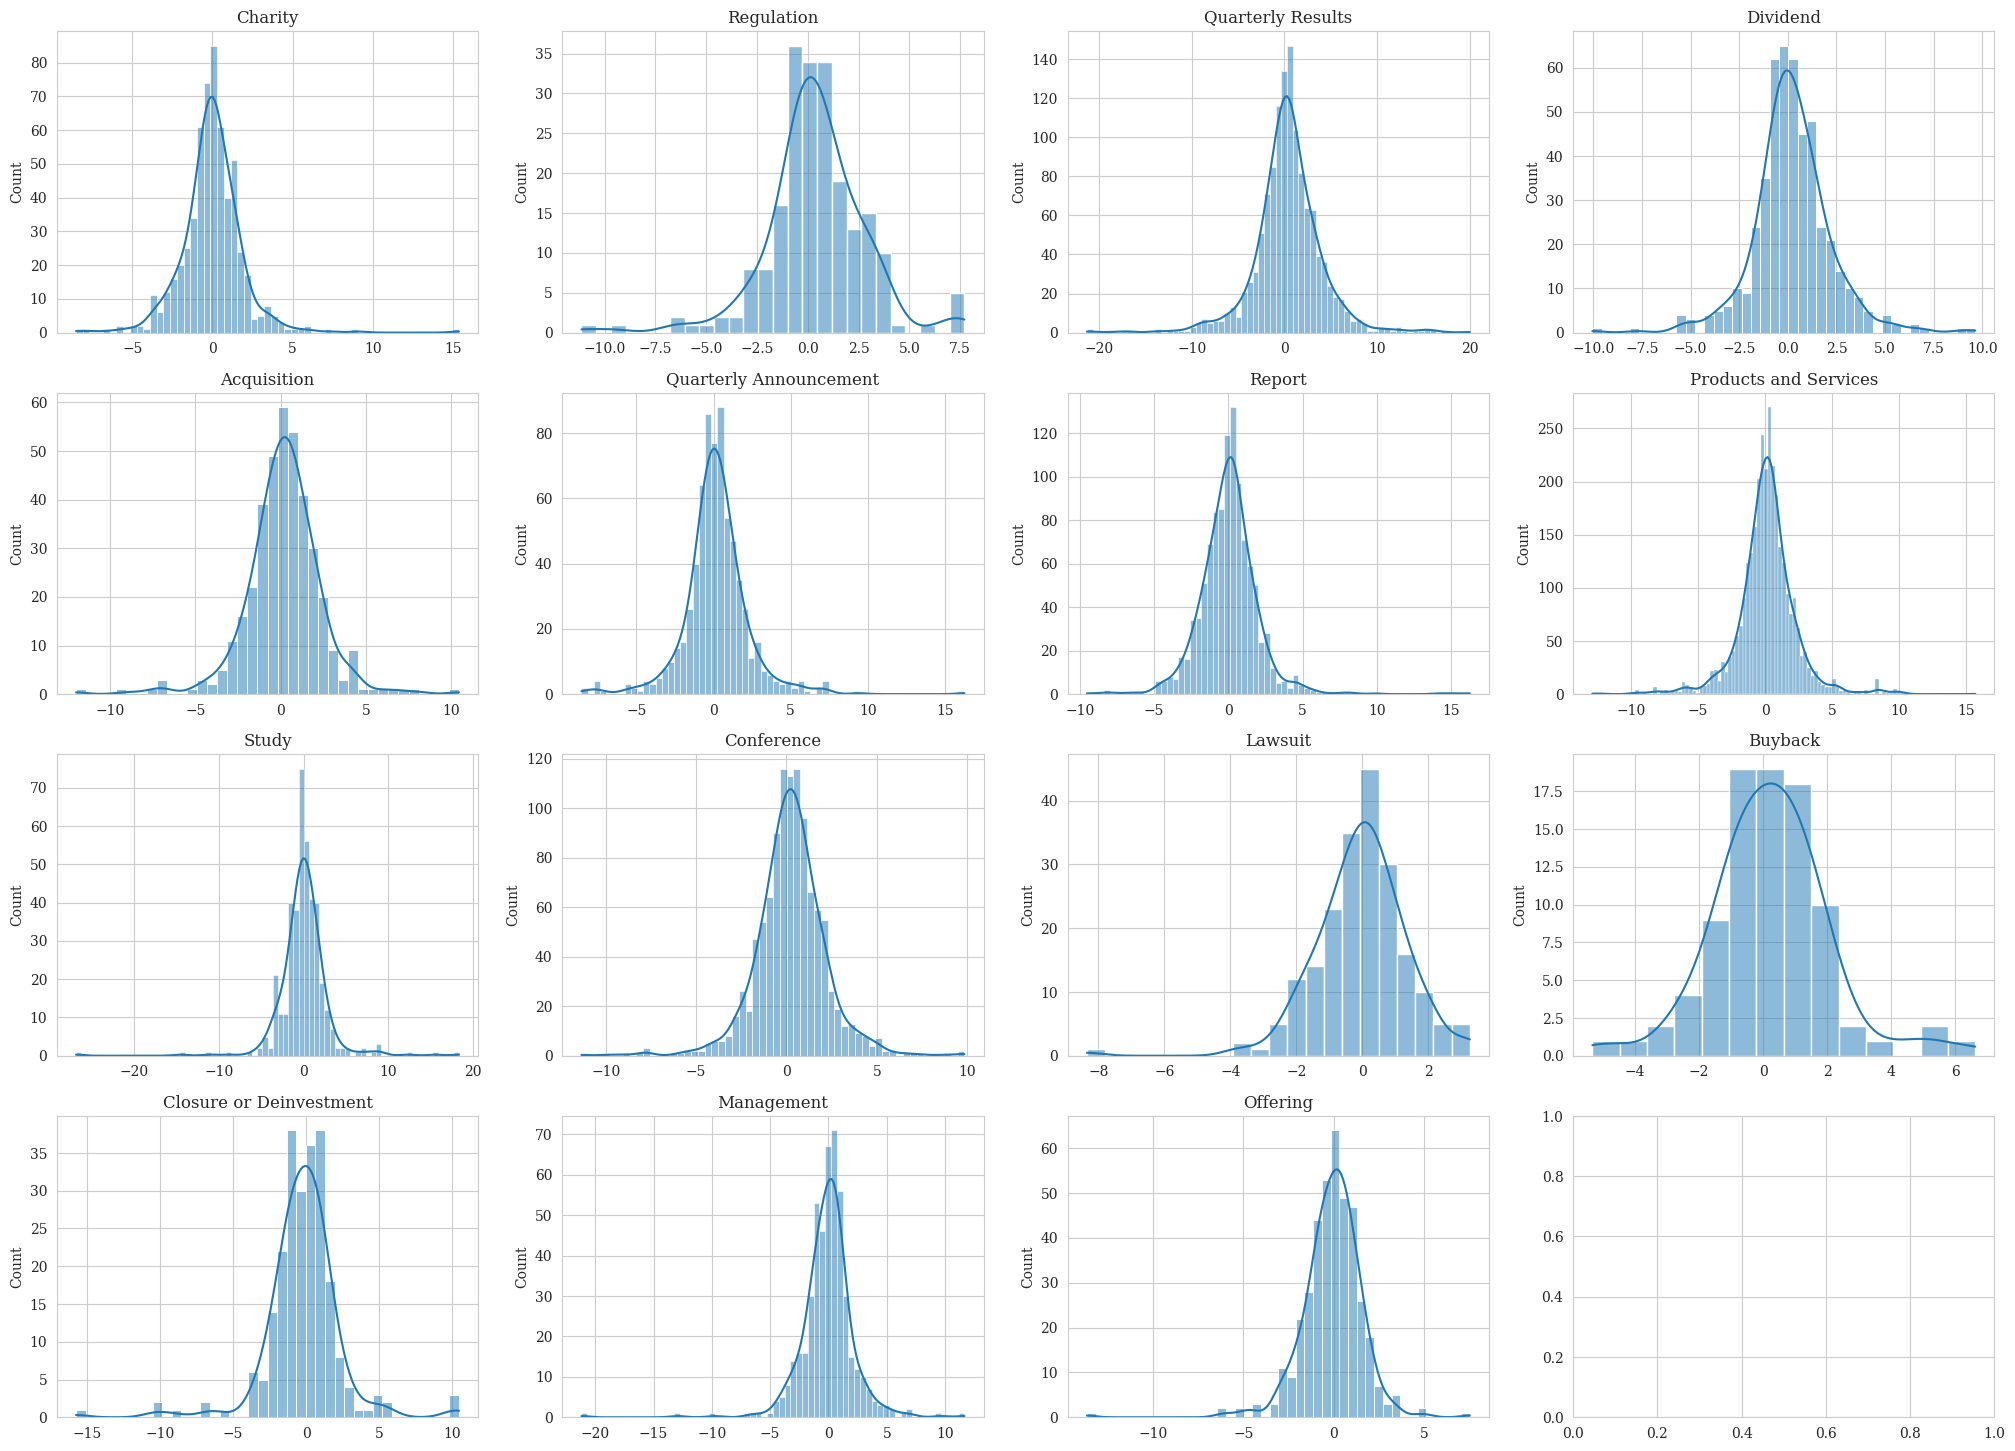

In [4]:
x_cord = 0
y_cord = 0
fig, axes = plt.subplots(4, 4, figsize=(25, 18))

for cur_class in classes:

    sns.histplot(changes_class_norm(cur_class, class_dict), kde=True, ax=axes[y_cord, x_cord]).set(title=cur_class)
    x_cord = x_cord + 1
    if x_cord == 4:
        x_cord = 0
        y_cord = y_cord + 1

In [11]:
tickers_length_dict = {}

for stock in data_bert:
    cur_length = len(stock['data'])
    tickers_length = {stock['ticker']: cur_length}
    tickers_length_dict.update(tickers_length)

In [8]:
tickers_length_dict
sns.barplot(x=list(tickers_length_dict.keys()), y=list(tickers_length_dict.values()), color='darkgrey').set(xlabel='ticker', ylabel='Number of press statements')
plt.xticks(rotation=45)
pass

NameError: name 'tickers_length_dict' is not defined

In [26]:
list(tickers_length_dict.keys())

['aapl',
 'ba',
 'ball',
 'cost',
 'fslr',
 'hd',
 'ice',
 'intu',
 'lly',
 'msft',
 'ndaq',
 'now',
 'nvda',
 'pm',
 'snps',
 'spgi',
 'syk',
 'tmo',
 'v',
 'vrtx']